In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
df = pd.read_csv("../data_cleaning/salary_cleaned_data.csv")
df.head(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,Company Text,Job State,Same state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,50,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,39,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,13,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,58,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,25,1,0,0,0,1
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,...,95.0,CyrusOne\n,TX,1,23,1,0,0,1,1
6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,...,73.5,ClearOne Advantage\n,MD,1,15,0,0,0,0,1
7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,...,114.0,Logic20/20\n,CA,0,18,1,0,1,1,1
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,...,61.0,Rochester Regional Health\n,NY,1,9,0,0,0,0,0
9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,...,140.0,<intent>\n,NY,1,14,1,0,1,0,0


### Job Title and Seniority


In [86]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [87]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [88]:
df['job_simp'] = df["Job Title"].apply(title_simplifier)
df['seniority'] = df["Job Title"].apply(seniority)
print(df.seniority.value_counts(),df.job_simp.value_counts(), sep="\n\n")

na        520
senior    220
jr          2
Name: seniority, dtype: int64

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64


### Fixing Los Angeles 

In [89]:
df["Job State"].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
DE      6
GA      6
KY      6
MI      6
CT      5
IA      5
NE      4
LA      4
OR      4
KS      3
NM      3
MN      2
ID      2
SC      1
RI      1
Name: Job State, dtype: int64

### Job Description length

In [90]:
df["desc_len"] = df["Job Description"].apply(lambda x: len(x))

### Competitors Count

In [91]:
df["Competitors"]

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [92]:
df["num_competitors"] = df["Competitors"].apply(lambda x: len(x.split(",")) if x != '-1' else 0)
df.num_competitors

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_competitors, Length: 742, dtype: int64

### Hourly wage to Annual

In [93]:
print(df[df["Hourly"] == 1][["Salary Estimate", "Hourly", "min_salary", "max_salary"]])
df["min_salary"] = df.apply(lambda x: x.min_salary*2 if x.Hourly == 1  else x.min_salary, axis=1)
df["max_salary"] = df.apply(lambda x: x.max_salary*2 if x.Hourly == 1  else x.max_salary, axis=1)
df[df["Hourly"] == 1][["Salary Estimate", "Hourly", "min_salary", "max_salary"]]


                               Salary Estimate  Hourly  min_salary  max_salary
165           $17-$24 Per Hour(Glassdoor est.)       1          17          24
177           $21-$34 Per Hour(Glassdoor est.)       1          21          34
197           $18-$25 Per Hour(Glassdoor est.)       1          18          25
202           $21-$34 Per Hour(Glassdoor est.)       1          21          34
210           $15-$25 Per Hour(Glassdoor est.)       1          15          25
246           $17-$24 Per Hour(Glassdoor est.)       1          17          24
271           $21-$34 Per Hour(Glassdoor est.)       1          21          34
337           $18-$25 Per Hour(Glassdoor est.)       1          18          25
345           $24-$39 Per Hour(Glassdoor est.)       1          24          39
357           $21-$34 Per Hour(Glassdoor est.)       1          21          34
363  Employer Provided Salary:$25-$28 Per Hour       1          25          28
408           $21-$29 Per Hour(Glassdoor est.)      

,Salary Estimate,Hourly,min_salary,max_salary
165,$17-$24 Per Hour(Glassdoor est.),1,34,48
177,$21-$34 Per Hour(Glassdoor est.),1,42,68
197,$18-$25 Per Hour(Glassdoor est.),1,36,50
202,$21-$34 Per Hour(Glassdoor est.),1,42,68
210,$15-$25 Per Hour(Glassdoor est.),1,30,50
246,$17-$24 Per Hour(Glassdoor est.),1,34,48
271,$21-$34 Per Hour(Glassdoor est.),1,42,68
337,$18-$25 Per Hour(Glassdoor est.),1,36,50
345,$24-$39 Per Hour(Glassdoor est.),1,48,78
357,$21-$34 Per Hour(Glassdoor est.),1,42,68


### Remove new line from job title

In [94]:
print(df["Company Text"])
df["Company Text"] = df["Company Text"].apply(lambda x: x.replace("\n",""))
df["Company Text"]

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: Company Text, Length: 742, dtype: object


0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company Text, Length: 742, dtype: object

In [95]:
df.describe()

,Rating,Founded,Hourly,Employer Provided,min_salary,max_salary,avg_salary,Same state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len,num_competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,49.389488,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.962906,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,27.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,62.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [96]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'min_salary', 'max_salary', 'avg_salary',
       'Company Text', 'Job State', 'Same state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_competitors'],
      dtype='object')

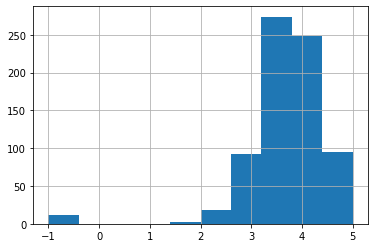

In [97]:
df.Rating.hist()

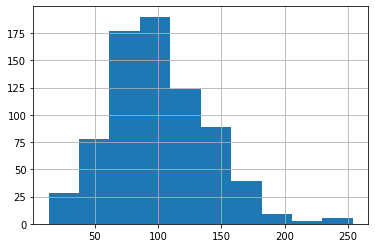

In [98]:
df.avg_salary.hist()

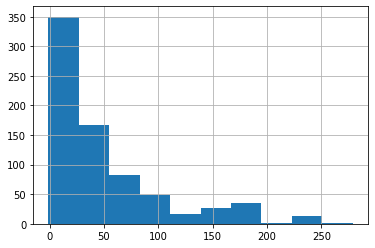

In [99]:
df.age.hist()

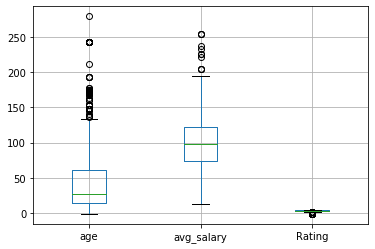

In [100]:
df.boxplot(column=["age","avg_salary","Rating"])

In [112]:
corr = df[["age","avg_salary", "Rating", "desc_len","num_competitors"]].corr()
df[["age","avg_salary", "Rating", "desc_len", "num_competitors"]].corr()

,age,avg_salary,Rating,desc_len,num_competitors
age,1.000000,0.019410,0.026164,0.164730,0.129057
avg_salary,0.019410,1.000000,0.013492,0.078808,0.093813
Rating,0.026164,0.013492,1.000000,-0.012281,0.027190
desc_len,0.164730,0.078808,-0.012281,1.000000,0.104620
num_competitors,0.129057,0.093813,0.027190,0.104620,1.000000


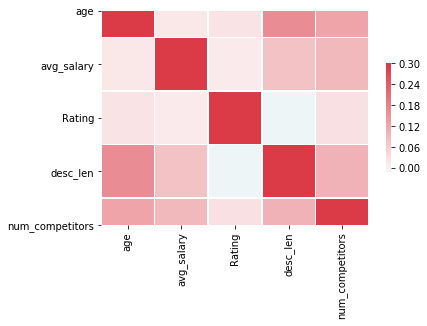

In [113]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, vmax=0.3,center=0, cmap=cmap,square=True, linewidths=0.5, cbar_kws={"shrink":0.5})

Graph for Location: total 20


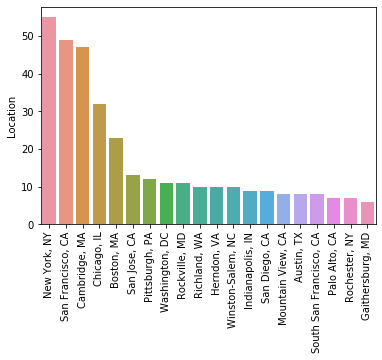

Graph for Headquarters: total 20


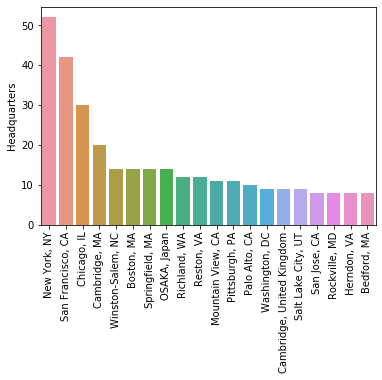

Graph for Company Text: total 20


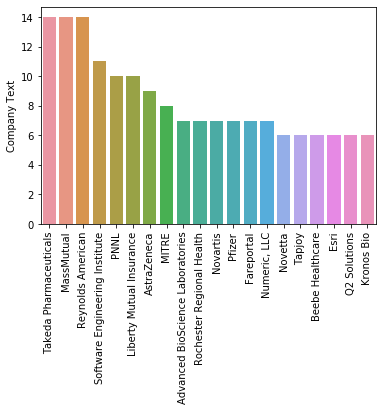

In [131]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company Text', 'Job State','Same state', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]
# df_cat["Location"].value_counts()[:20]
for column in df[["Location","Headquarters","Company Text"]]:
      column_num = df_cat[column].value_counts()[:20]
      print(f"Graph for {column}: total {len(column_num)}")
      # Using Matplotlib
      # plt.bar(x=column_num.index,height=column_num)
      # plt.xlabel(column)
      # plt.ylabel("Count")
      # plt.xticks(rotation=90)
      # plt.show()
      # Using Seaborn
      chart = sns.barplot(x=column_num.index, y=column_num)
      chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
      plt.show()